In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree, metrics, svm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.preprocessing import Normalizer, StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("train.csv")
data

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [3]:
data.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [4]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand = True)

In [5]:
data["day"] = pd.to_numeric(data["day"])
data["month"] = pd.to_numeric(data["month"])
data["year"] = pd.to_numeric(data["year"])

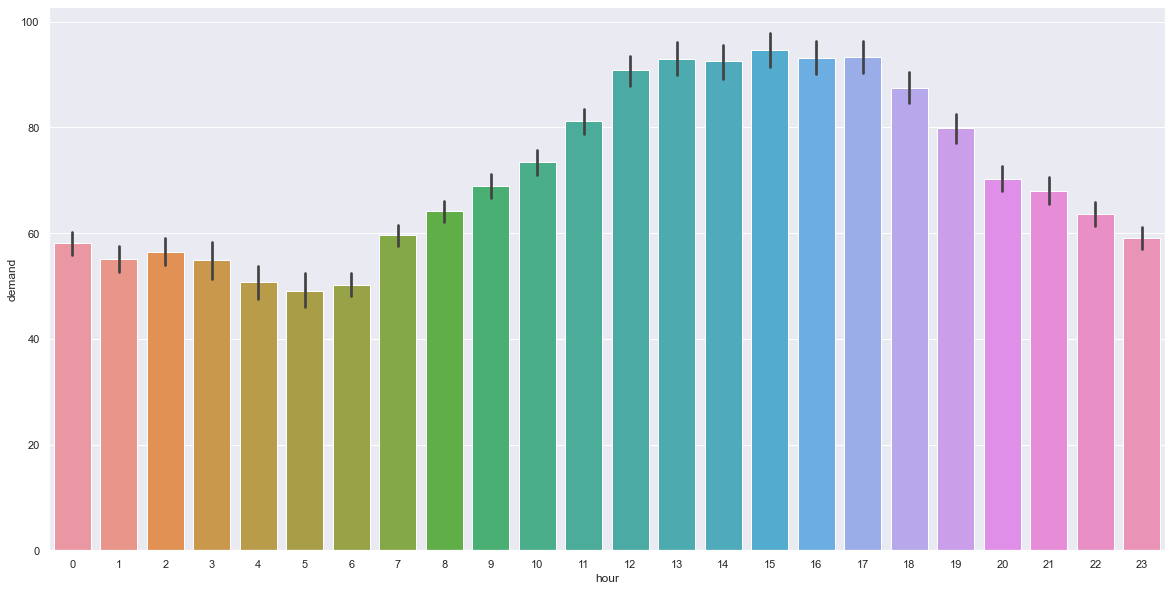

In [6]:
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.barplot(data['hour'], data['demand'])

In [7]:
data.drop("date", axis=1, inplace=True)

In [8]:
X = data.drop("demand", axis=1)
X

,hour,day,month,year
0,9,2018,8,18
1,10,2018,8,18
2,13,2018,8,18
3,14,2018,8,18
4,15,2018,8,18
...,...,...,...,...
18242,19,2021,2,28
18243,20,2021,2,28
18244,21,2021,2,28
18245,22,2021,2,28


In [9]:
y = data["demand"]
y

0         91
1         21
2         23
3        104
4         81
        ... 
18242     95
18243     88
18244     39
18245    104
18246     85
Name: demand, Length: 18247, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [11]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('LightGBM', LGBMRegressor()))
models.append(('Tree', DecisionTreeRegressor()))
models.append(('Forest', RandomForestRegressor()))
models.append(('Boost', XGBRegressor()))
models.append(('Neighbor', KNeighborsRegressor()))
models.append(('Hist', HistGradientBoostingRegressor()))
models.append(('Ada', AdaBoostRegressor()))
models.append(('Cat', CatBoostRegressor(max_depth = 3, n_estimators = 1000, boosting_type='Plain')))

In [12]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Root mean squared error for ", name, ":", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean squared error for  Linear : 41.36003799275718
Root mean squared error for  Lasso : 41.37208590355197
Root mean squared error for  Ridge : 41.36003149089776
Root mean squared error for  LightGBM : 33.58431616860819
Root mean squared error for  Tree : 45.65005063839109
Root mean squared error for  Forest : 33.99315760910485
Root mean squared error for  Boost : 34.27524801948824
Root mean squared error for  Neighbor : 36.239628451732706
Root mean squared error for  Hist : 33.73150476581305
Root mean squared error for  Ada : 38.5587555526332
Learning rate set to 0.061421
0:	learn: 41.2362435	total: 54.8ms	remaining: 54.8s
1:	learn: 40.9213427	total: 56.8ms	remaining: 28.3s
2:	learn: 40.6480692	total: 58.3ms	remaining: 19.4s
3:	learn: 40.4057399	total: 60.1ms	remaining: 15s
4:	learn: 40.1656388	total: 61.8ms	remaining: 12.3s
5:	learn: 39.9929072	total: 63.2ms	remaining: 10.5s
6:	learn: 39.8348612	total: 64.3ms	remaining: 9.12s
7:	learn: 39.6471551	total: 65.6ms	remaining: 8.13s
8:

218:	learn: 36.0562518	total: 337ms	remaining: 1.2s
219:	learn: 36.0524579	total: 339ms	remaining: 1.2s
220:	learn: 36.0502580	total: 340ms	remaining: 1.2s
221:	learn: 36.0461784	total: 341ms	remaining: 1.2s
222:	learn: 36.0442876	total: 342ms	remaining: 1.19s
223:	learn: 36.0388936	total: 344ms	remaining: 1.19s
224:	learn: 36.0310738	total: 345ms	remaining: 1.19s
225:	learn: 36.0277272	total: 346ms	remaining: 1.19s
226:	learn: 36.0212904	total: 347ms	remaining: 1.18s
227:	learn: 36.0171556	total: 349ms	remaining: 1.18s
228:	learn: 36.0137803	total: 350ms	remaining: 1.18s
229:	learn: 36.0087850	total: 351ms	remaining: 1.18s
230:	learn: 36.0059248	total: 352ms	remaining: 1.17s
231:	learn: 36.0031259	total: 354ms	remaining: 1.17s
232:	learn: 36.0000624	total: 355ms	remaining: 1.17s
233:	learn: 35.9974541	total: 356ms	remaining: 1.17s
234:	learn: 35.9913339	total: 357ms	remaining: 1.16s
235:	learn: 35.9867021	total: 358ms	remaining: 1.16s
236:	learn: 35.9823922	total: 360ms	remaining: 1.1

528:	learn: 35.2686896	total: 688ms	remaining: 612ms
529:	learn: 35.2673547	total: 689ms	remaining: 611ms
530:	learn: 35.2656624	total: 690ms	remaining: 610ms
531:	learn: 35.2645145	total: 691ms	remaining: 608ms
532:	learn: 35.2611811	total: 692ms	remaining: 607ms
533:	learn: 35.2595113	total: 694ms	remaining: 605ms
534:	learn: 35.2580900	total: 695ms	remaining: 604ms
535:	learn: 35.2572774	total: 696ms	remaining: 602ms
536:	learn: 35.2556303	total: 697ms	remaining: 601ms
537:	learn: 35.2543588	total: 698ms	remaining: 600ms
538:	learn: 35.2537757	total: 699ms	remaining: 598ms
539:	learn: 35.2520906	total: 701ms	remaining: 597ms
540:	learn: 35.2499199	total: 702ms	remaining: 595ms
541:	learn: 35.2489335	total: 703ms	remaining: 594ms
542:	learn: 35.2472403	total: 704ms	remaining: 592ms
543:	learn: 35.2463569	total: 705ms	remaining: 591ms
544:	learn: 35.2445350	total: 706ms	remaining: 590ms
545:	learn: 35.2423631	total: 707ms	remaining: 588ms
546:	learn: 35.2408743	total: 708ms	remaining:

834:	learn: 34.8549810	total: 1.04s	remaining: 205ms
835:	learn: 34.8543228	total: 1.04s	remaining: 204ms
836:	learn: 34.8531191	total: 1.04s	remaining: 203ms
837:	learn: 34.8519614	total: 1.04s	remaining: 202ms
838:	learn: 34.8505533	total: 1.04s	remaining: 200ms
839:	learn: 34.8495775	total: 1.04s	remaining: 199ms
840:	learn: 34.8474977	total: 1.04s	remaining: 198ms
841:	learn: 34.8467443	total: 1.05s	remaining: 196ms
842:	learn: 34.8457271	total: 1.05s	remaining: 195ms
843:	learn: 34.8442110	total: 1.05s	remaining: 194ms
844:	learn: 34.8427181	total: 1.05s	remaining: 193ms
845:	learn: 34.8418392	total: 1.05s	remaining: 191ms
846:	learn: 34.8410753	total: 1.05s	remaining: 190ms
847:	learn: 34.8404781	total: 1.05s	remaining: 189ms
848:	learn: 34.8393031	total: 1.05s	remaining: 188ms
849:	learn: 34.8383132	total: 1.05s	remaining: 186ms
850:	learn: 34.8374044	total: 1.06s	remaining: 185ms
851:	learn: 34.8361893	total: 1.06s	remaining: 184ms
852:	learn: 34.8357298	total: 1.06s	remaining:

In [13]:
test = pd.read_csv("test.csv")
test

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [14]:
valid = test.copy()
valid

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [15]:
test[["day", "month", "year"]] = test["date"].str.split("-", expand = True)

In [16]:
test["day"] = pd.to_numeric(test["day"])
test["month"] = pd.to_numeric(test["month"])
test["year"] = pd.to_numeric(test["year"])

In [17]:
test

,date,hour,day,month,year
0,2021-03-01,0,2021,3,1
1,2021-03-01,1,2021,3,1
2,2021-03-01,2,2021,3,1
3,2021-03-01,3,2021,3,1
4,2021-03-01,5,2021,3,1
...,...,...,...,...,...
7645,2022-03-28,19,2022,3,28
7646,2022-03-28,20,2022,3,28
7647,2022-03-28,21,2022,3,28
7648,2022-03-28,22,2022,3,28


In [18]:
test.drop("date", axis=1, inplace=True)

In [19]:
predictions = models[3][1].predict(test)

In [20]:
predictions = pd.DataFrame(predictions, columns=["demand"])

In [21]:
final = pd.concat([valid,predictions], axis=1)
final.to_csv("submit.csv", index=False)